In [1]:
import pandas as pd
import  matplotlib.pyplot as plt
import  seaborn as sns

In [4]:
DF1 =pd.read_csv ("C:/Users/ASUS/Downloads/DATOS/ResultadosElectorales_2023_Generales.csv")
print (DF1.head())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11256\275477467.py:1: DtypeWarning: Columns (7,10,11,20) have mixed types. Specify dtype option on import or set low_memory=False.
  DF1 =pd.read_csv ("C:/Users/ASUS/Downloads/DATOS/ResultadosElectorales_2023_Generales.csv")


    año eleccion_tipo recuento_tipo padron_tipo  distrito_id  \
0  2023       GENERAL    PROVISORIO      NORMAL            1   
1  2023       GENERAL    PROVISORIO      NORMAL            1   
2  2023       GENERAL    PROVISORIO      NORMAL            1   
3  2023       GENERAL    PROVISORIO      NORMAL            1   
4  2023       GENERAL    PROVISORIO      NORMAL            1   

                   distrito_nombre  seccionprovincial_id  \
0  Ciudad Autónoma de Buenos Aires                     0   
1  Ciudad Autónoma de Buenos Aires                     0   
2  Ciudad Autónoma de Buenos Aires                     0   
3  Ciudad Autónoma de Buenos Aires                     0   
4  Ciudad Autónoma de Buenos Aires                     0   

  seccionprovincial_nombre  seccion_id seccion_nombre  ... mesa_tipo  \
0                      NaN           1      Comuna 01  ...   NATIVOS   
1                      NaN           1      Comuna 01  ...   NATIVOS   
2                      NaN           1

In [5]:
DF1.dtypes


año                           int64
eleccion_tipo                object
recuento_tipo                object
padron_tipo                  object
distrito_id                   int64
distrito_nombre              object
seccionprovincial_id          int64
seccionprovincial_nombre     object
seccion_id                    int64
seccion_nombre               object
circuito_id                  object
circuito_nombre              object
mesa_id                       int64
mesa_tipo                    object
mesa_electores                int64
cargo_id                      int64
cargo_nombre                 object
agrupacion_id                 int64
agrupacion_nombre            object
lista_numero                float64
lista_nombre                 object
votos_tipo                   object
votos_cantidad                int64
dtype: object

In [6]:
DF1[["agrupacion_nombre","votos_cantidad"]]

,agrupacion_nombre,votos_cantidad
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,UNION POR LA PATRIA,95
...,...,...
5868097,NaN,0
5868098,UNION POR LA PATRIA,40
5868099,JUNTOS POR EL CAMBIO,22
5868100,LA LIBERTAD AVANZA,18


In [7]:
DF1.groupby(["agrupacion_nombre","votos_cantidad"]).size().to_frame().head(5)


0
agrupacion_nombre    votos_cantidad   
ACCION POR VILLARINO 29              1
                     38              1
                     39              2
                     42              2
                     43              1

In [9]:
DF1.groupby(["agrupacion_nombre"])["votos_cantidad"].sum().to_frame()

,votos_cantidad
agrupacion_nombre,
ACCION POR VILLARINO,6242
ACCION VECINAL GENERAL VILLEGAS,962
AGRUP.VECINAL 24 DE OCTUBRE,2108
AGRUPACION COMUNAL TRANSFORMADORA,5704
AHORA PATRIA,570814
...,...
UNIDOS POR LONDRES,2204
UNION POR LA PATRIA,54402866
UNION POR SAN LUIS,243351


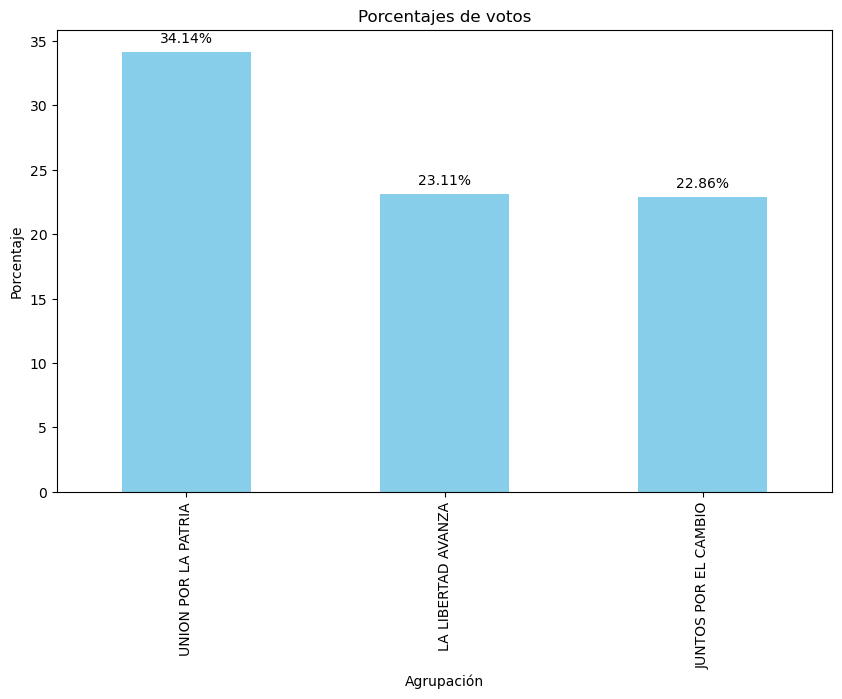

In [13]:
total_votos = DF1['votos_cantidad'].sum()
porcentaje_votos = (DF1.groupby('agrupacion_nombre')['votos_cantidad'].sum() / total_votos) * 100
los3 = porcentaje_votos.nlargest(3)
plt.figure(figsize=(10, 6))
los3.plot(kind='bar', color='skyblue')
plt.xlabel('Agrupación')
plt.ylabel('Porcentaje')
plt.title('Porcentajes de votos')
for index, value in enumerate(los3):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')
plt.show()

In [24]:
filtroCaba = DF1[(DF1["distrito_nombre"]== "Ciudad Autónoma de Buenos Aires") & (DF1["cargo_nombre"] == "PRESIDENTE Y VICE") & (DF1["agrupacion_nombre"] == "UNION POR LA PATRIA")]
#Primero creamos un nuevo df con solo las filas de CABA
filtroCaba


,año,eleccion_tipo,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre,...,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
4,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,349,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,95
14,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,82
24,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,346,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,92
35,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,349,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,82
44,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236325,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,15,Comuna 15,...,NATIVOS,346,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,95
236335,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,15,Comuna 15,...,NATIVOS,346,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,74
236345,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,15,Comuna 15,...,NATIVOS,343,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,93
236355,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,15,Comuna 15,...,NATIVOS,347,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,96


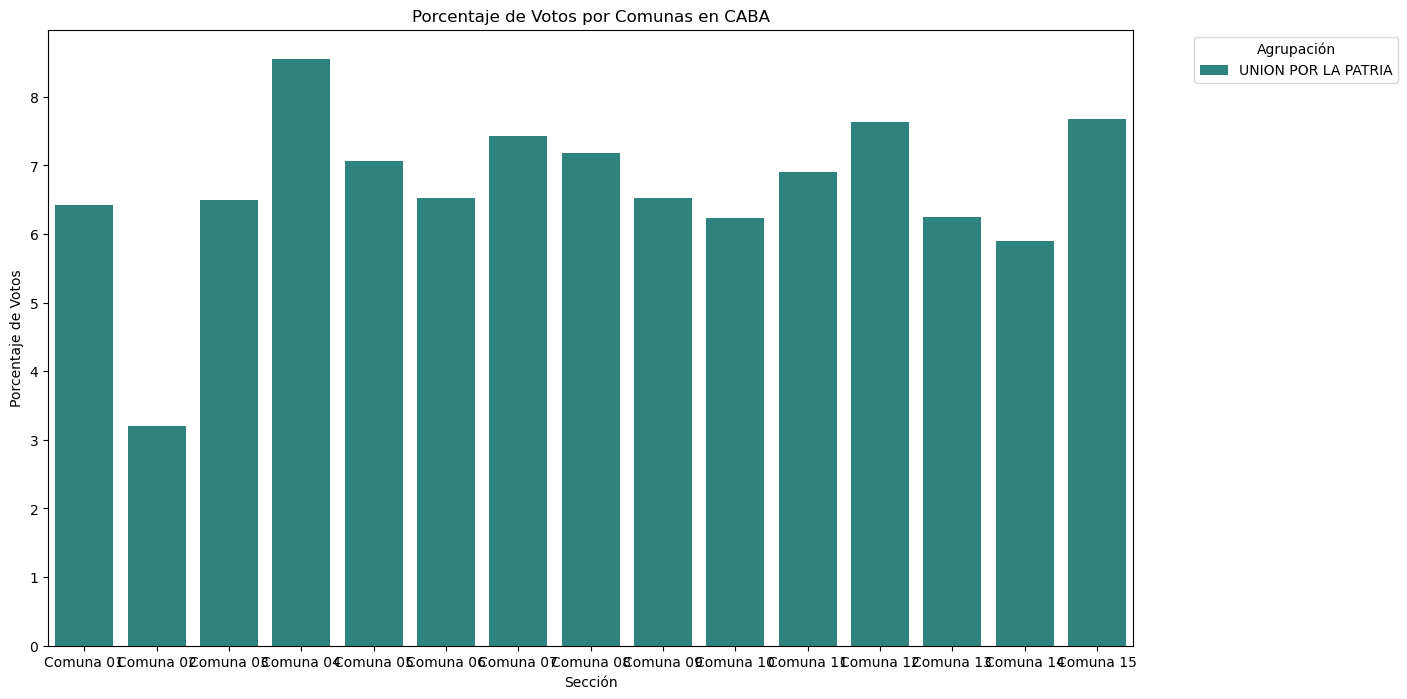

In [22]:
total = filtroCaba["votos_cantidad"].sum()

# Lo agrupo  por sección y agrupación, calculando los votos totales y el porcentaje como marco leo 
resultados = filtroCaba.groupby(["seccion_nombre", "agrupacion_nombre"]).agg(
    votos_totales=("votos_cantidad", "sum"),
    porcentaje=("votos_cantidad", lambda x: round((x.sum() * 100) / total, 2))
).reset_index()

# convertí  la columna 'porcentaje' a tipo de datos numérico porque me rompi el codigo y no podía 
resultados['porcentaje'] = pd.to_numeric(resultados['porcentaje'])

# cree un gráfico de barras 
plt.figure(figsize=(14, 8))
sns.barplot(x='seccion_nombre', y='porcentaje', hue='agrupacion_nombre', data=resultados, palette='viridis')

# reever los nombres, le puse el que me parecio y los valores los saque standar 
plt.legend(title='Agrupación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Sección')
plt.ylabel('Porcentaje de Votos')
plt.title('Porcentaje de Votos por Comunas en CABA')

plt.show()